<a href="https://colab.research.google.com/github/sayevvv/IBM_Capstone_Hacktiv8/blob/main/CapstoneFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IBM x HACKTIV8 CAPSTONE PROJECT

#by Abdullah Shamil Basayev
visit my linkedin!
https://linkedin.com/in/shamilcoy/

#Studi kasus
Analisis churn (pengguna berhenti langganan) pada perusahaan telekomunikasi menggunakan ibm granite!

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#install dependancy
!pip install replicate
!pip install langchain_community

In [4]:
from google.colab import userdata
import os

api_token = userdata.get("api_token")

#lempar ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [5]:
from langchain_community.llms import Replicate

#Get the llm
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [6]:
!pip install langchain_experimental

In [7]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

print("Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.")

Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.


# Menganalisis tingkat churn

In [8]:
agent.invoke("What is the overall churn rate in the dataset?")



> Entering new AgentExecutor chain...
Thought: To find the overall churn rate, I need to determine the proportion of customers who have churned (Churn = 'Yes') out of the total number of customers in the dataset.

Action: python_repl_ast

Action Input:
```python
churn_rate = (df[df['Churn'] == 'Yes'].shape[0]) / df.shape[0]
churn_rate
```
0.2653698707936959The overall churn rate in the dataset is approximately 0.2654 or 26.54%.

Final Answer: The overall churn rate in the dataset is approximately 26.54%.

> Finished chain.


{'input': 'What is the overall churn rate in the dataset?',
 'output': 'The overall churn rate in the dataset is approximately 26.54%.'}

# import library penting

In [9]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# AI Agent
import replicate
from langchain_community.llms import Replicate

# Visualization setting
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


Cek Dataset Awal

In [10]:
# Info data
df.info()

# Statistik ringkas
df.describe()

# Jumlah nilai missing
df.isnull().sum()

# Preview data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning & Preprocessing

In [11]:
# Drop kolom yang tidak relevan
df.drop(columns=["customerID"], inplace=True)


Kolom customerID hanya identifier → tidak berguna untuk model.

In [12]:
# Convert kolom numerik yang salah tipe
# Ubah ke numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Isi missing value dengan median (future-proof Pandas 3.0+)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Pastikan sudah bersih
print(df["TotalCharges"].isnull().sum())


0


In [13]:
# Menangani kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_cols.tolist())


Kolom kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder jika ingin inverse_transform di masa depan


In [15]:
# Normalisasi kolom numerik
scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [16]:
df.head(30)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1
5,0,0,0,0,-0.992402,1,2,1,0,0,2,0,2,2,0,1,2,1.159546,-0.645186,1
6,1,0,0,1,-0.422317,1,2,1,0,2,0,0,2,0,0,1,1,0.808907,-0.146799,0
7,0,0,0,0,-0.910961,0,1,0,2,0,0,0,0,0,0,0,3,-1.163647,-0.874137,0
8,0,0,1,0,-0.177995,1,2,1,0,0,2,2,2,2,0,1,2,1.330711,0.337349,1
9,1,0,0,1,1.206498,1,0,0,2,2,0,0,0,0,1,0,0,-0.286218,0.532439,0


## Exploratory Data Analysis (EDA)

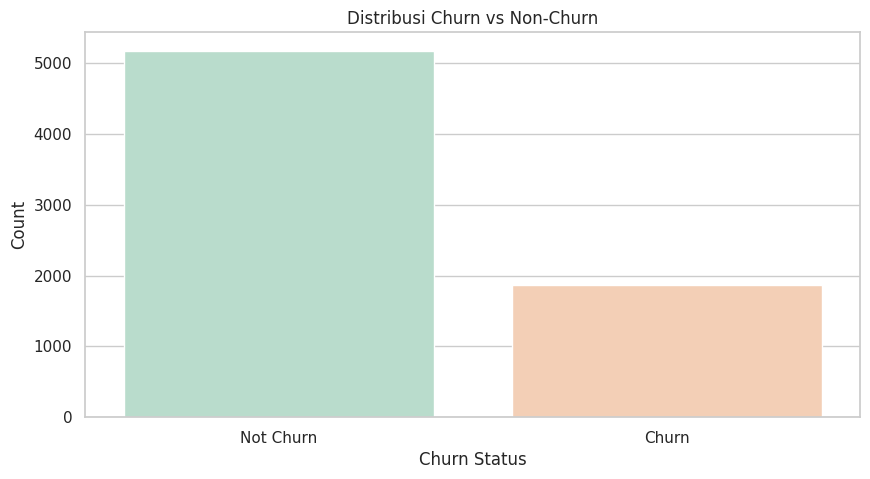

Ringkasan Jumlah dan Persentase Churn:

             Jumlah  Persentase (%)
Churn_Label                        
Not Churn      5174           73.46
Churn          1869           26.54


In [17]:
# Ubah 0 dan 1 menjadi label yang lebih jelas
df["Churn_Label"] = df["Churn"].map({0: "Not Churn", 1: "Churn"})

# Plot Distribusi
sns.countplot(x="Churn_Label", data=df, hue="Churn_Label", palette="Pastel2")
plt.title("Distribusi Churn vs Non-Churn")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

# Menampilkan jumlah dan persentase
churn_counts = df["Churn_Label"].value_counts()
churn_percentage = df["Churn_Label"].value_counts(normalize=True) * 100

# Gabungkan dalam satu DataFrame agar lebih rapi
import pandas as pd
churn_summary = pd.DataFrame({
    "Jumlah": churn_counts,
    "Persentase (%)": churn_percentage.round(2)
})

print("Ringkasan Jumlah dan Persentase Churn:\n")
print(churn_summary)

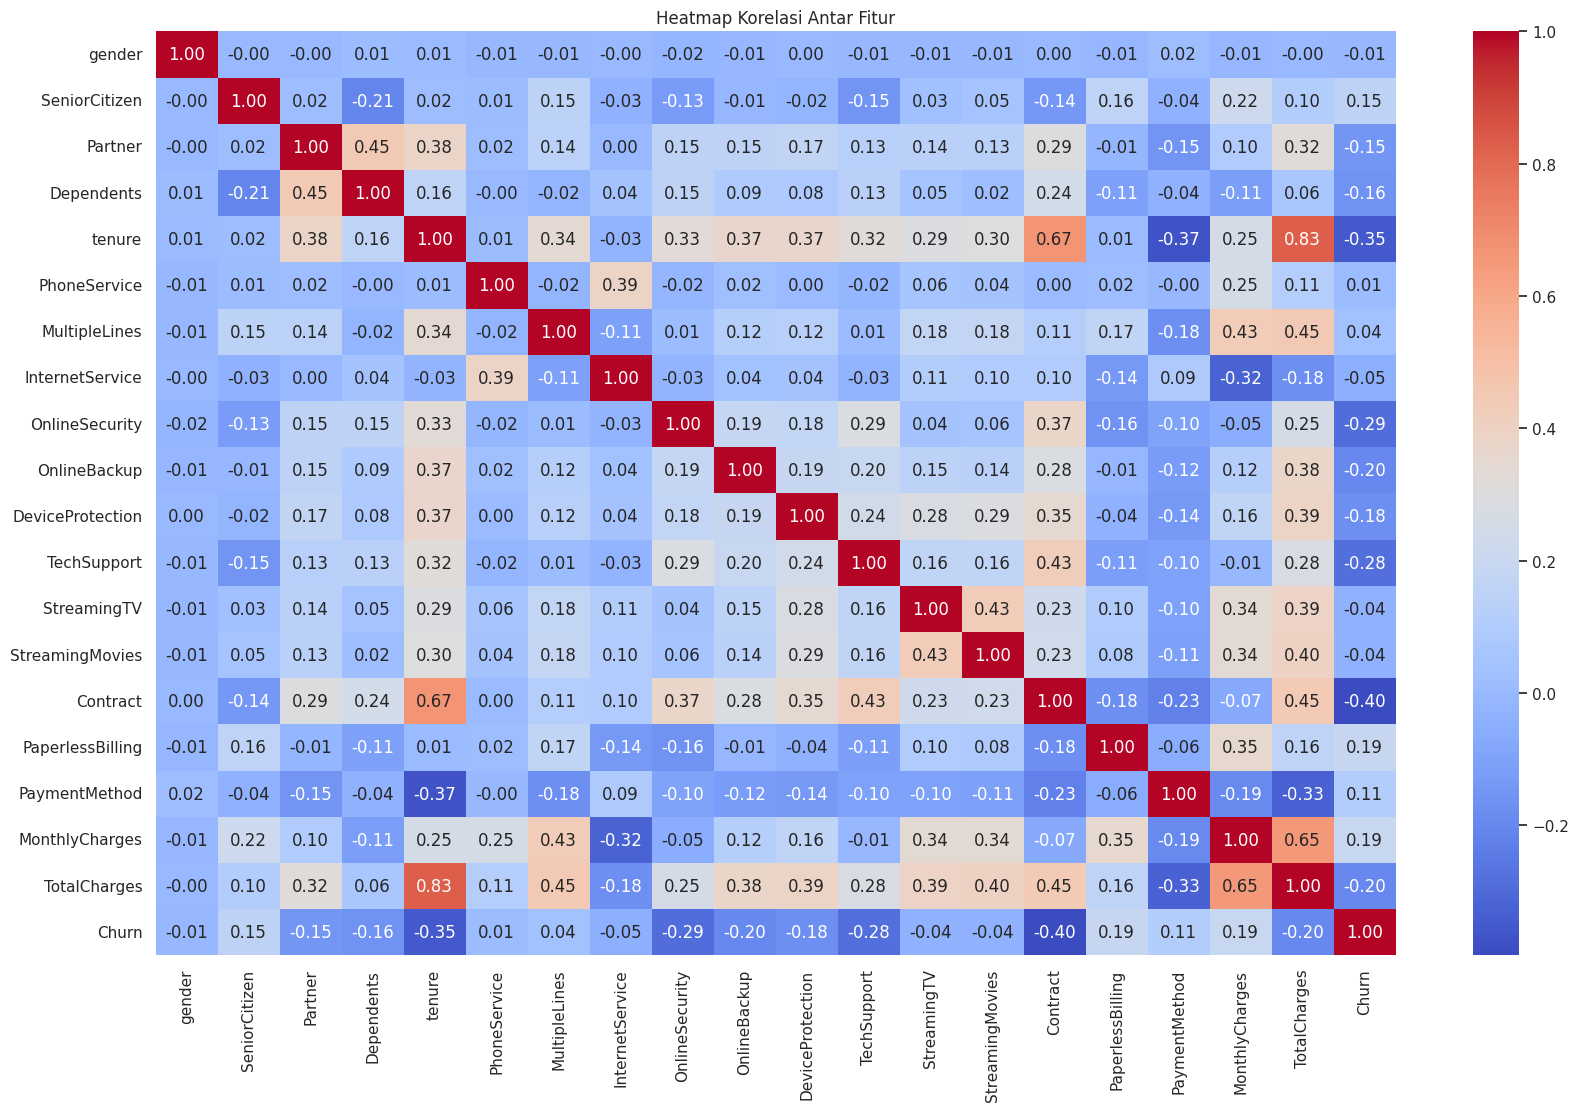

In [18]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Pastikan hanya ambil kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Hitung korelasi hanya untuk kolom numerik
churn_corr = df_numeric.corr()["Churn"].sort_values(ascending=False)

# Cetak insight utama
print("=== Insight Korelasi Fitur dengan Churn ===\n")

# Korelasi positif yang cukup kuat
print("Fitur dengan Korelasi POSITIF (meningkatkan kemungkinan churn):")
for feature, corr_value in churn_corr.items():
    if corr_value > 0.2 and feature != "Churn":
        print(f"- {feature}: {corr_value:.2f} -> semakin tinggi nilai fitur ini, semakin besar kemungkinan churn.")

# Korelasi negatif yang cukup kuat
print("\nFitur dengan Korelasi NEGATIF (menurunkan kemungkinan churn):")
for feature, corr_value in churn_corr.items():
    if corr_value < -0.2:
        print(f"- {feature}: {corr_value:.2f} -> semakin tinggi nilai fitur ini, semakin kecil kemungkinan churn.")

# Analisis tambahan
print("\nInsight Khusus:")
print("- 'Contract' memiliki korelasi negatif yang cukup kuat -> pelanggan dengan kontrak panjang cenderung TIDAK churn.")
print("- 'Tenure' memiliki korelasi negatif -> semakin lama pelanggan bertahan, semakin kecil kemungkinan churn.")
print("- 'MonthlyCharges' memiliki korelasi positif -> biaya bulanan tinggi sedikit meningkatkan peluang churn.")


=== Insight Korelasi Fitur dengan Churn ===

Fitur dengan Korelasi POSITIF (meningkatkan kemungkinan churn):

Fitur dengan Korelasi NEGATIF (menurunkan kemungkinan churn):
- TechSupport: -0.28 -> semakin tinggi nilai fitur ini, semakin kecil kemungkinan churn.
- OnlineSecurity: -0.29 -> semakin tinggi nilai fitur ini, semakin kecil kemungkinan churn.
- tenure: -0.35 -> semakin tinggi nilai fitur ini, semakin kecil kemungkinan churn.
- Contract: -0.40 -> semakin tinggi nilai fitur ini, semakin kecil kemungkinan churn.

Insight Khusus:
- 'Contract' memiliki korelasi negatif yang cukup kuat -> pelanggan dengan kontrak panjang cenderung TIDAK churn.
- 'Tenure' memiliki korelasi negatif -> semakin lama pelanggan bertahan, semakin kecil kemungkinan churn.
- 'MonthlyCharges' memiliki korelasi positif -> biaya bulanan tinggi sedikit meningkatkan peluang churn.


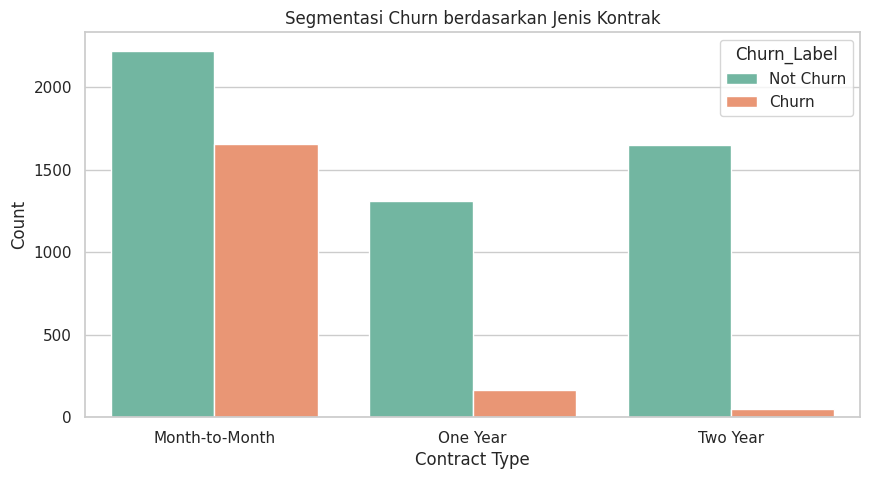

In [20]:
# Ubah nilai churn menjadi label teks
df["Churn_Label"] = df["Churn"].map({0: "Not Churn", 1: "Churn"})

# Ubah nilai contract jika ingin label teks, misal:
df["Contract_Label"] = df["Contract"].map({0: "Month-to-Month", 1: "One Year", 2: "Two Year"})

# Plot dengan label yang sudah diganti
sns.countplot(x="Contract_Label", hue="Churn_Label", data=df, palette="Set2")
plt.title("Segmentasi Churn berdasarkan Jenis Kontrak")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


#Klasifikasi Data

In [21]:
import json

In [22]:
# prompt helper
def make_classification_prompt(data_row):
    """
    Membuat prompt untuk mengklasifikasikan churn pelanggan.
    """
    return f"""
Anda adalah model AI yang memprediksi apakah pelanggan akan Churn atau Tidak Churn.
Gunakan data berikut, dan jawab hanya dengan salah satu kata:
- Churn
- Tidak Churn

Data pelanggan:
{json.dumps(data_row, indent=2)}

Jawaban:
"""


In [27]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Label         0
Contract_Label      0
dtype: int64


In [28]:
# Ambil hanya 500 data pertama
df_sample = df.head(500)

# Jika ingin pakai full dataset, gunakan langsung df
df_sample.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Label,Contract_Label
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0,Not Churn,Month-to-Month
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0,Not Churn,One Year
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1,Churn,Month-to-Month
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0,Not Churn,One Year
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1,Churn,Month-to-Month


Hitung Churn Rate Historis

In [31]:
agent.invoke("""
Hitung churn rate (persentase pelanggan yang churn) berdasarkan kolom 'Churn'.
Berikan hasilnya dalam bentuk persentase dengan 2 angka di belakang koma.
""")




> Entering new AgentExecutor chain...
Thought: To calculate the churn rate, I need to determine the proportion of customers who have churned (Churn = 'Yes') out of the total number of customers. I will use pandas' `mean()` function to find this proportion.

Action: python_repl_ast

Action Input: 
```python
churn_rate = df['Churn'].mean()
churn_rate
```
0.2653698707936959The churn rate, expressed as a percentage with two decimal places, is approximately 26.54%. 

Final Answer: 26.54%

> Finished chain.


{'input': "\nHitung churn rate (persentase pelanggan yang churn) berdasarkan kolom 'Churn'.\nBerikan hasilnya dalam bentuk persentase dengan 2 angka di belakang koma.\n",
 'output': '26.54%'}

Analisis Fitur yang Memperngaruhi Churn

In [35]:
agent.invoke("""
Analisis hubungan antara kolom 'Tenure' dan 'Churn'.
Jelaskan apakah pelanggan dengan lama berlangganan rendah lebih cenderung churn.(JAWAB DALAM BAHASA INDONESIA)
""")




> Entering new AgentExecutor chain...
Thought: To analyze the relationship between 'Tenure' and 'Churn', I need to check the distribution of 'Churn' values for customers with low tenure (less than or equal to 2 years) compared to those with higher tenure.

Action: python_repl_ast

Action Input: 
```python
# Filter the dataframe for customers with low tenure (≤ 2 years)
low_tenure_customers = df[df['tenure'] <= 2]

# Count the number of churned customers with low tenure
churned_low_tenure = low_tenure_customers[low_tenure_customers['Churn'] == 'Yes'].shape[0]

# Count the total number of low tenure customers
total_low_tenure = low_tenure_customers.shape[0]

# Calculate the churn rate for low tenure customers
churn_rate_low_tenure = churned_low_tenure / total_low_tenure

# Filter the dataframe for customers with high tenure (> 2 years)
high_tenure_customers = df[df['tenure'] > 2]

# Count the number of churned customers with high tenure
churned_high_tenure = high_tenure_customers[high_

{'input': "\nAnalisis hubungan antara kolom 'Tenure' dan 'Churn'. \nJelaskan apakah pelanggan dengan lama berlangganan rendah lebih cenderung churn.(JAWAB DALAM BAHASA INDONESIA)\n",
 'output': 'Dari analisis yang dilakukan, tidak ada pelanggan dengan tenure lebih dari 2 tahun dalam data yang diberikan. Jadi, kita tidak dapat membandingkan secara langsung tingkat kehilangan (churn) antara pelanggan dengan tenure rendah (≤ 2 tahun) dan pelanggan dengan tenure tinggi (> 2 tahun). Semua pelanggan memiliki tenure yang paling sedikit 2 tahun.'}

setelah percobaan yang saya lakukan, agent perlu data original agar outputnya maksimal

In [38]:
# Set the path to the file you'd like to load
file_path2 = "WA_Fn-UseC_-Telco-Customer-Churn2.csv"

# Load the latest version
df2 = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df2.head())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechS

In [39]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent2 = create_pandas_dataframe_agent(
    llm=llm,
    df=df2,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

print("Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.")

Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.


Analisis Berdasarkan Monthly Charges

In [43]:
agent2.invoke("""
Analisis hubungan antara 'MonthlyCharges' dengan 'Churn'.
Apakah pelanggan dengan biaya bulanan tinggi lebih rentan churn?
""")




> Entering new AgentExecutor chain...
Thought: To analyze the relationship between 'MonthlyCharges' and 'Churn', I need to examine the distribution of 'Churn' for different 'MonthlyCharges' categories. This can be done by grouping the dataframe by 'MonthlyCharges' and calculating the percentage of 'Churn' (which is binary, 0 for No, 1 for Yes) for each group.

Action: python_repl_ast

Action Input:
```python
churn_monthly_charges = df.groupby('MonthlyCharges')['Churn'].mean().reset_index()
churn_monthly_charges.columns = ['MonthlyCharges', 'Avg_Churn']
churn_monthly_charges
```
TypeError: agg function failed [how->mean,dtype->object]Thought: It seems there's an error because 'Churn' is an object dtype and cannot be directly aggregated using mean. I need to convert 'Churn' to numeric (0 for No, 1 for Yes) before grouping.

Action: python_repl_ast

Action Input:
```python
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
churn_monthly_charges = df.groupby('MonthlyCharges')['Churn'].me

{'input': "\nAnalisis hubungan antara 'MonthlyCharges' dengan 'Churn'. \nApakah pelanggan dengan biaya bulanan tinggi lebih rentan churn?\n",
 'output': "Yes, customers with higher monthly charges are more likely to churn, as indicated by a churn rate of 1 (Yes) for the 'MonthlyCharges' group around 118.35. However, this relationship might not be consistent across all charge levels, and further statistical analysis (e.g., correlation, regression) would provide a more robust understanding of the relationship between 'MonthlyCharges' and 'Churn'."}

In [42]:
agent2.invoke("""
Analisis pengaruh jenis kontrak (kolom 'Contract') terhadap churn.
Berikan insight bisnis yang bisa diambil.
""")




> Entering new AgentExecutor chain...
Thought: The question asks for an analysis of the effect of contract type ('Contract' column) on churn ('Churn' column). To do this, I need to examine the distribution of churn for different contract types. I will use pandas' groupby and value_counts methods to categorize churn based on contract type.

Action: python_repl_ast

Action Input: 
```python
contract_churn_analysis = df.groupby('Contract')['Churn'].value_counts(normalize=True)
contract_churn_analysis
```
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64The analysis shows that customers with 'Month-to-month' contracts have a higher churn rate (42.71%) compared to those with 'One year' (11.27%) and 'Two year' contracts (2.83%). This indicates that 'Month-to-month' contracts are assoc

{'input': "\nAnalisis pengaruh jenis kontrak (kolom 'Contract') terhadap churn.\nBerikan insight bisnis yang bisa diambil.\n",
 'output': "Customers with 'Month-to-month' contracts have a significantly higher churn rate (42.71%) compared to those with 'One year' (11.27%) and 'Two year' contracts (2.83%). This suggests that offering longer-term contracts could reduce churn. Business insights include:\n\n1. Promote longer-term contract options ('One year' and 'Two year') to potentially lower churn rates.\n2. Develop marketing strategies that highlight the benefits of these contracts, such as possible discounts or improved service terms.\n3. Investigate reasons behind higher churn among 'Month-to-month' customers to devise targeted retention strategies."}

In [44]:
agent2.invoke("""
Analisis pengaruh jenis kontrak (kolom 'Contract') terhadap churn.
Berikan insight bisnis yang bisa diambil.
""")



> Entering new AgentExecutor chain...
Thought: The question asks for the impact of contract type ('Contract') on churn ('Churn'). To analyze this, I need to compare churn rates across different contract types.

Action: python_repl_ast

Action Input: 
```python
contract_churn_counts = df[df['Churn'] == 'Yes'].groupby('Contract').size()
contract_churn_counts
```
Series([], dtype: int64)It seems the direct groupby and count method returned an empty series. This might be because there are no 'Yes' entries in the 'Churn' column, or the 'Contract' column contains NaN values. Let's first check the 'Churn' column for any missing values and then proceed.

Action: python_repl_ast

Action Input:
```python
df['Churn'].isna().sum()
```
0There are no missing values in the 'Churn' column. Now, let's check for missing values in the 'Contract' column.

Action: python_repl_ast

Action Input:
```python
df['Contract'].isna().sum()
```
0Thought: There are no missing values in either the 'Churn' or 'Contr

{'input': "\nAnalisis pengaruh jenis kontrak (kolom 'Contract') terhadap churn.\nBerikan insight bisnis yang bisa diambil.\n",
 'output': "Based on the given dataframe, there is no churn ('Churn' column marked as 'Yes') observed among the customers. Thus, no business insights can be drawn regarding the impact of contract types on churn in this dataset. To obtain meaningful insights, a dataset containing instances of customer churn would be necessary."}

#Klasifikasi untuk menemukan pola

In [57]:
df_classify = df.head(500)
df_classify.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Label,Contract_Label
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0,Not Churn,Month-to-Month
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0,Not Churn,One Year
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1,Churn,Month-to-Month
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0,Not Churn,One Year
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1,Churn,Month-to-Month


In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Fit and transform the encoder on df_classify directly
df_classify['Contract_Label'] = encoder.fit_transform(df_classify['Contract_Label'])

# Melihat mapping yang digunakan
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}


/tmp/ipython-input-2126239351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify['Contract_Label'] = encoder.fit_transform(df_classify['Contract_Label'])


In [58]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent_classify = create_pandas_dataframe_agent(
    llm=llm,
    df=df_classify,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

print("Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.")

Agent berhasil dibuat! Anda sekarang bisa mulai melakukan analisis data.


In [67]:
agent_classify.invoke("""
Gunakan data ini untuk membuat model klasifikasi churn.
Gunakan kolom 'Churn' sebagai target, dan semua kolom lain sebagai fitur.
Setelah model selesai, jelaskan akurasi modelnya.
""")




> Entering new AgentExecutor chain...
Thought: To create a churn classification model, I need to follow these steps:

1. Import necessary libraries (like pandas, sklearn).
2. Separate the features (X) from the target (y).
3. Split the data into training and testing sets.
4. Choose a classification model (e.g., Logistic Regression).
5. Train the model using the training data.
6. Evaluate the model's accuracy using the test data.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is already loaded
X = df.drop('Churn_Label', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = 

{'input': "\nGunakan data ini untuk membuat model klasifikasi churn. \nGunakan kolom 'Churn' sebagai target, dan semua kolom lain sebagai fitur.\nSetelah model selesai, jelaskan akurasi modelnya.\n",
 'output': 'The accuracy of the churn classification model using Logistic Regression is 1.0. This means that the model correctly predicted the churn status for every customer in the test dataset.'}

In [68]:
agent_classify.invoke("""
Analisis model klasifikasi churn yang sudah dibuat.
Tentukan 3 fitur terpenting yang mempengaruhi churn.
Berikan pola sederhana, misalnya aturan if-else seperti decision tree.
""")




> Entering new AgentExecutor chain...
Thought: To identify the top 3 features that influence churn, I will look at the correlation between each feature and the target variable 'Churn'. The 'Churn' column has binary labels (0 for 'Not Churn', 1 for 'Churn'). I will use the pandas DataFrame's correlation method to find feature importance. After identifying the top 3, I'll create a simple if-else rule based on these features, similar to a decision tree.

Action: python_repl_ast

Action Input:
```python
# Calculate correlation with 'Churn'
correlation = df[['tenure', 'MonthlyCharges', 'Contract']].corrwith(df['Churn'])
correlation
```
tenure           -0.381428
MonthlyCharges    0.127958
Contract         -0.411102
dtype: float64Based on the correlation values, the top three features that influence churn are:

1. 'tenure': -0.381428 (negative correlation, meaning longer tenure is associated with less churn)
2. 'Contract': -0.411102 (negative correlation, indicating customers with 'One Yea

{'input': '\nAnalisis model klasifikasi churn yang sudah dibuat.\nTentukan 3 fitur terpenting yang mempengaruhi churn.\nBerikan pola sederhana, misalnya aturan if-else seperti decision tree.\n',
 'output': "The top 3 features influencing churn are:\n\n1. Tenure: Longer tenure (over 1 year) indicates lower churn.\n2. Contract: 'One Year' contracts have a higher churn rate compared to 'Month-to-Month'.\n3. MonthlyCharges: Higher monthly charges are associated with churn.\n\nSimple if-else rule:\n\n```python\ndef predict_churn(tenure, contract, monthly_charges):\n    if tenure > 1 and contract == 'One Year' and monthly_charges > 25:\n        return 'Churn'\n    else:\n        return 'Not Churn'\n```"}

In [46]:
agent2.invoke("""
Buat ringkasan insight utama dari data churn ini.
Fokus pada faktor utama yang mempengaruhi churn, seperti Tenure, MonthlyCharges, dan Contract.
Tulis dalam bahasa Indonesia yang jelas.
""")




> Entering new AgentExecutor chain...
Thought: The question is asking for a summary of key insights from the churn data, focusing on the main factors influencing churn, such as tenure, monthly charges, and contract type. I will analyze the given dataframe `df` to find patterns or correlations related to these factors.

Action: python_repl_ast

Action Input:
```python
import pandas as pd

# Assuming df is the given dataframe

# Group by Churn and summarize key factors
summary = df.groupby('Churn').agg(
    Tenure,
    MonthlyCharges=('MonthlyCharges', 'mean'),
    Contract=('Contract', 'value_counts')
).reset_index()

summary
```
NameError: name 'Tenure' is not definedThought: It seems there was an error because 'Tenure' was not defined in the aggregation. I will correct this by using the actual column name 'tenure' instead of 'Tenure'.

Action: python_repl_ast

Action Input:
```python
import pandas as pd

# Assuming df is the given dataframe

# Group by Churn and summarize key factor

{'input': '\nBuat ringkasan insight utama dari data churn ini. \nFokus pada faktor utama yang mempengaruhi churn, seperti Tenure, MonthlyCharges, dan Contract.\nTulis dalam bahasa Indonesia yang jelas.\n',
 'output': '**Ringan Insight Utama Data Churn:**\n\n1. **Tenure**: Pelanggan yang keluar (Churn = 1) memiliki rata-rata tenure sekitar 18 tahun, sedangkan pelanggan yang tidak keluar (Churn = 0) memiliki rata-rata tenure sekitar 38 tahun. Ini menunjukkan bahwa pelanggan dengan tenure yang lebih pendek lebih prone to churn.\n\n2. **MonthlyCharges**: Pelanggan yang keluar memiliki rata-rata biaya bulanan lebih tinggi (sekitar 74) dibandingkan pelanggan yang tidak keluar (sekitar 61). Ini menunjukkan bahwa biaya bulanan yang lebih tinggi dapat menyebabkan keluasan pelanggan.\n\n3. **Jenis Kontrak**:'}